## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...).

Свою копию вы сможете изменять и запускать.


#Необходимые ресурсы

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

Boston Housing price regression dataset
https://keras.io/api/datasets/boston_housing/

- Образцы содержат 13 атрибутов домов в разных местах пригорода Бостона в конце 1970-х годов.

- Цели (Targets) - это средние значения домов в определенном месте (в тыс. $).

- Сами атрибуты определены на веб-сайте StatLib http://lib.stat.cmu.edu/datasets/boston.


Variables in order:

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000

 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Просмотр данных**

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:


x_train.shape

(404, 13)

In [ ]:
x_test.shape

(102, 13)

In [ ]:
x_train[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [ ]:
y_train[:3]

array([15.2, 42.3, 50. ])

In [ ]:
n = 0
print(x_train[n])
print(y_train[n])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


**Нормализация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [ ]:
# Среднее значение для обучающего набора данных
mean = x_train.mean(axis=0)
# Стандартное отклонение для обучающего набора данных
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
print(x_train[n])
print(y_train[n])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


In [ ]:
x_train.shape

(404, 13)

In [ ]:
x_train.shape[1]

13

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [ ]:
model = Sequential()
#model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1)) # если допускаются отрицательные значения
model.add(Dense(1, activation='relu'))

In [ ]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

None


**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [ ]:
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/200
12/12 - 2s - 129ms/step - loss: 216.0682 - mae: 11.0785 - val_loss: 18.1677 - val_mae: 3.4771
Epoch 2/200
12/12 - 0s - 10ms/step - loss: 23.0603 - mae: 3.3796 - val_loss: 19.6669 - val_mae: 3.3388
Epoch 3/200
12/12 - 0s - 12ms/step - loss: 18.6887 - mae: 2.9836 - val_loss: 20.0464 - val_mae: 3.3937
Epoch 4/200
12/12 - 0s - 4ms/step - loss: 15.3183 - mae: 2.7439 - val_loss: 17.9969 - val_mae: 3.6326
Epoch 5/200
12/12 - 0s - 5ms/step - loss: 14.0840 - mae: 2.5965 - val_loss: 17.3826 - val_mae: 3.3191
Epoch 6/200
12/12 - 0s - 5ms/step - loss: 13.2588 - mae: 2.4758 - val_loss: 10.8026 - val_mae: 2.6344
Epoch 7/200
12/12 - 0s - 5ms/step - loss: 12.9304 - mae: 2.5971 - val_loss: 14.2960 - val_mae: 3.2141
Epoch 8/200
12/12 - 0s - 4ms/step - loss: 13.5535 - mae: 2.4834 - val_loss: 8.4415 - val_mae: 2.4479
Epoch 9/200
12/12 - 0s - 5ms/step - loss: 12.8290 - mae: 2.4808 - val_loss: 15.1627 - val_mae: 2.7872
Epoch 10/200
12/12 - 0s - 5ms/step - loss: 12.7846 - mae: 2.5276 - val_loss: 

## Проверяем работу модели на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.4691 - mae: 2.2891


In [ ]:
scores

[15.188488960266113, 2.4895334243774414]

In [ ]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 2.4895


## Визуализация качества обучения

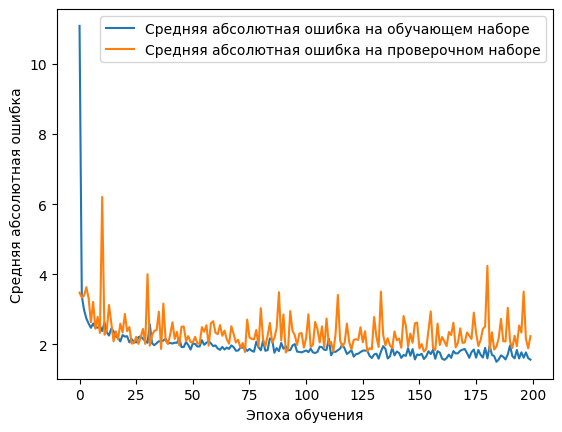

In [ ]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [ ]:
pred = model.predict(x_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
print(pred)

[ 7.989189  19.02522   22.23235   34.895985  26.982712  23.547434
 28.297546  22.564463  19.490633  20.52622   14.794265  17.230423
 15.89354   44.73373   20.997099  21.741232  26.633871  20.075283
 17.48938   21.066961  11.473251  12.563948  23.045313  14.718078
 20.879213  24.249792  30.787151  31.167173  11.0252075 20.854471
 20.011595  15.3185005 34.83234   24.743256  18.033478   7.172868
 16.705204  18.802523  20.181967  27.308996  33.902637  29.180214
 13.501611  44.876858  31.579206  27.312521  29.705946  18.79401
 21.985325  23.473372  37.424053  20.680624   9.51677   14.463487
 37.64951   28.466238  12.424993  50.982376  37.16632   23.666231
 25.533302  15.063928  16.190367  20.468739  24.69264   21.939623
 13.810936  22.581635  12.512773   7.5524683 19.845074  32.148766
 24.372065  12.813014  26.621824  18.844162  20.339472  24.63349
 37.166798   8.946452  22.212517  39.354214  14.975373  13.307074
 17.70071   20.237234  22.477215  22.972479  21.937786  31.573996
 21.58653   

**Печатаем примеры результатов**

In [ ]:
test_index=25
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 24.249792 , правильная стоимость: 23.0


## Визуализируем результаты предсказаний

График предсказаний

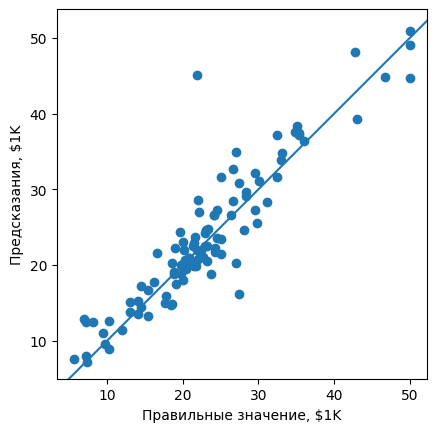

In [ ]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.axis('square')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

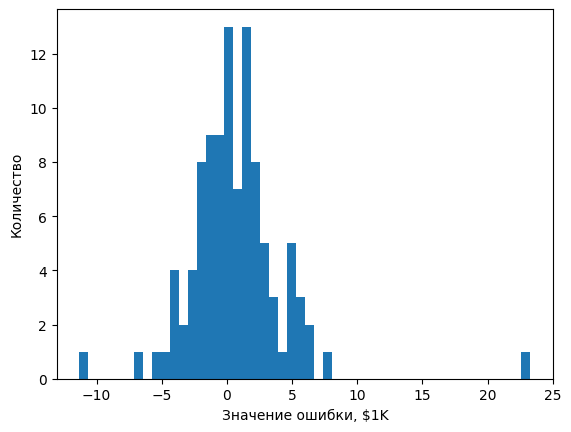

In [ ]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

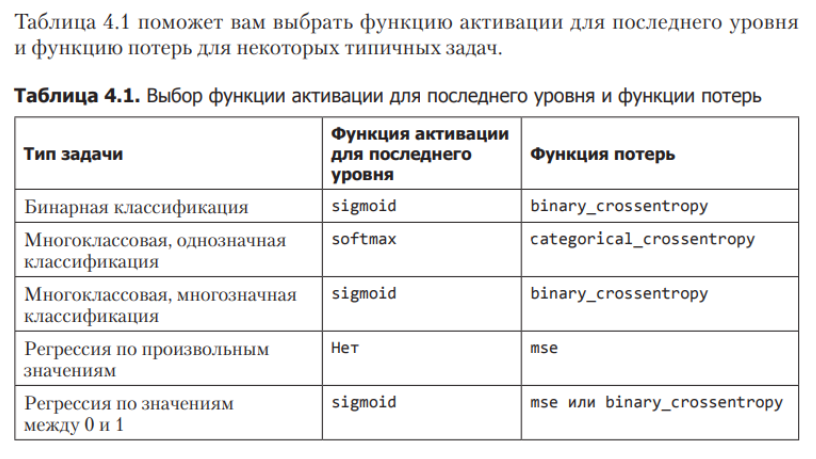

#Средняя абсолютная ошибка (mae)

**mae — mean
absolute error** (средняя абсолютная ошибка) - это абсолютное значение разности
между предсказанными и целевыми значениями (метками).
Как правило, испоьзуется для метрики в задаче регрессии.


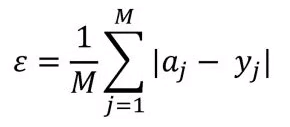

**mse — mean
squared error** (среднеквадратичная ошибка) - это квадрат разности между
предсказанными и целевыми значениями (метками). Как правило, испоьзуется для функции потерь.

# Средняя квадратичная ошибка (mse)

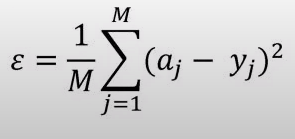

#Регуляризация - борьба с переобучением
Распространенные приемы регуляризации:

- Уменьшение размера сети - количество обучаемых параметров в модели - емкость модели (model capacity)
- Добавление регуляризации весов - уменьшении сложности сети путем ограничения значений ее весовых коэффициентов, что делает их распределение более равномерным
(подробнее читайте: Франсуа Шолле Глава 4 • Основы машинного обучения. 4.4.2. Добавление регуляризации весов)
- Добавление прореживания (dropout) к слою - удаление (присваивании нуля) случайно выбираемым признакам на этапе обучения
- Разделение данных на два набора: обучающий, проверочный
- Слой пакетной нормализации BatchNormalization

#Статьи
Обзор Keras для TensorFlow

https://habr.com/ru/post/482126/


#Задание
- Измените архитектуру нейронной сети:

 - Добавьте/удалите слои;

 - Измените количество нейронов;

- Добавьте дополнительную регуляризацию: Dropout, L2 или L1;

- Используйте разные оптимизаторы ('SGD', 'adam', 'adadelta').


- Изучите блокнот от The TensorFlow Authors

basic-regression.ipynb

https://colab.research.google.com/github/MarkDaoust/models/blob/add-regression-plots/samples/core/tutorials/keras/basic_regression.ipynb

- Изучите раздел 3.6. "Предсказание цен на дома:
пример регрессии" (стр. 111) в книге Ф. Шолле "Глубокое обучение на Python".  
- Сделайте оценку решения методом перекрестной проверки
по K блокам (стр. 114).


- Изучите раздел  4.4.2. Добавление регуляризации весов (стр. 136) в книге Ф. Шолле "Глубокое обучение на Python".